#### Inicializaciones generales

In [2]:
# Módulos para Jupyter
import warnings
warnings.filterwarnings('ignore')

# Módulos importantantes
import scipy.signal as sig
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#### Definición de función plot_frequency_response para filtros digitales

In [3]:
def plot_frequency_response(tfz):
    # Calculate frequency response
    w, h = sig.freqz(tfz.num, tfz.den)

    # Normalize frequency axis
    freq_normalized = w / np.pi

    # Create a figure with vertical layout
    fig = plt.figure(figsize=(20, 24))

    # Plot Módulo
    ax1 = fig.add_subplot(311)
    ax1.plot(freq_normalized, 20 * np.log10(np.abs(h)))
    ax1.set_title('Respuesta de Módulo')
    ax1.set_ylabel('Módulo [dB]')
    ax1.grid()
    ax1.annotate('', xy=(1, 0), xytext=(0, 0),
                  arrowprops=dict(facecolor='black', arrowstyle='->', linewidth=1))
    ax1.set_xlim(0, 1)

    # Plot Fase
    ax2 = fig.add_subplot(312)
    ax2.plot(freq_normalized, np.angle(h))
    ax2.set_title('Respuesta de Fase')
    ax2.set_ylabel('Fase [rad.]')
    ax2.grid()
    ax2.annotate('', xy=(1, 0), xytext=(0, 0),
                  arrowprops=dict(facecolor='black', arrowstyle='->', linewidth=1))
    ax2.set_xlim(0, 1)

    # Plot group delay
    ax3 = fig.add_subplot(313)
    gd = -np.diff(np.unwrap(np.angle(h))) / np.diff(w)
    ax3.plot(freq_normalized[1:], gd)
    ax3.set_title('Retardo de Grupo')
    ax3.set_xlabel('Frecuencia normalizada')
    ax3.set_ylabel('Retardo de Grupo [muestras]')
    ax3.grid()
    ax3.annotate('', xy=(1, 0), xytext=(0, 0),
                  arrowprops=dict(facecolor='black', arrowstyle='->', linewidth=1))
    ax3.set_xlim(0, 1)
    
    # Find maximum delay and set plot limits
    max_delay_samples = np.ceil(np.max(gd))
    ax3.set_ylim(0, max_delay_samples)

    # Plot poles and zeros in a separate figure
    plt.figure(figsize=(8, 8))
    plt.plot(np.real(tfz.zeros), np.imag(tfz.zeros), 'o', color='blue', markersize=10, fillstyle='none', markeredgewidth=2, label='ceros')
    plt.plot(np.real(tfz.poles), np.imag(tfz.poles), 'x', color='red', markersize=10, markeredgewidth=2, label='polos')
    
    # Plot unit circle
    unit_circle = plt.Circle((0, 0), 1, color='gray', linestyle='--', fill=False)
    plt.gca().add_patch(unit_circle)
    
    plt.title('Polos y ceros')
    plt.xlabel('Real')
    plt.ylabel('Imaginario')
    plt.legend()
    plt.grid()
    
    # Add double-ended arrows from plot edges
    xlim = plt.xlim()
    ylim = plt.ylim()
    arrowprops = dict(facecolor='black', arrowstyle='<->', linewidth=1)
    plt.annotate('', xy=(xlim[0], 0), xytext=(xlim[1], 0), arrowprops=arrowprops)
    plt.annotate('', xy=(0, ylim[0]), xytext=(0, ylim[1]), arrowprops=arrowprops)

    plt.tight_layout()
    plt.show()

#### Definición de función plot_module_response para filtros digitales

In [12]:
def plot_module_response(tfz):
    # Calculate frequency response
    w, h = sig.freqz(tfz.num, tfz.den)

    # Normalize frequency axis
    freq_normalized = w / np.pi

    # Create a figure with vertical layout
    fig = plt.figure(figsize=(20, 24))

    # Plot Módulo
    ax1 = fig.add_subplot(311)
    ax1.plot(freq_normalized, 20 * np.log10(np.abs(h)))
    ax1.set_title('Respuesta de Módulo')
    ax1.set_ylabel('Módulo [dB]')
    ax1.grid()
    ax1.annotate('', xy=(1, 0), xytext=(0, 0),
                  arrowprops=dict(facecolor='black', arrowstyle='->', linewidth=1))
    ax1.set_xlim(0, 1)
    
    # Add double-ended arrows from plot edges
    xlim = plt.xlim()
    ylim = plt.ylim()
    arrowprops = dict(facecolor='black', arrowstyle='<->', linewidth=1)
    plt.annotate('', xy=(xlim[0], 0), xytext=(xlim[1], 0), arrowprops=arrowprops)
    plt.annotate('', xy=(0, ylim[0]), xytext=(0, ylim[1]), arrowprops=arrowprops)

    plt.tight_layout()
    plt.show()

## Examen final - 13/05/2024

### Ejercicio 2

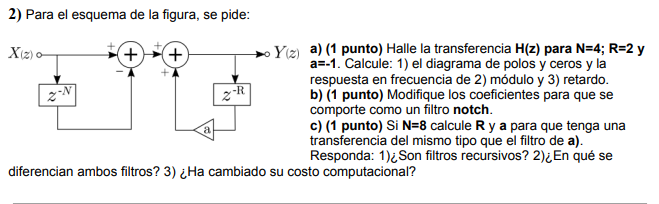

En el caso de este ejercicio, se adjunta el desarrollo completo manuscrito y luego se vuelve a trabajar, sección por sección descripto en Markdown y simulado

##### Desarrollo tradicional

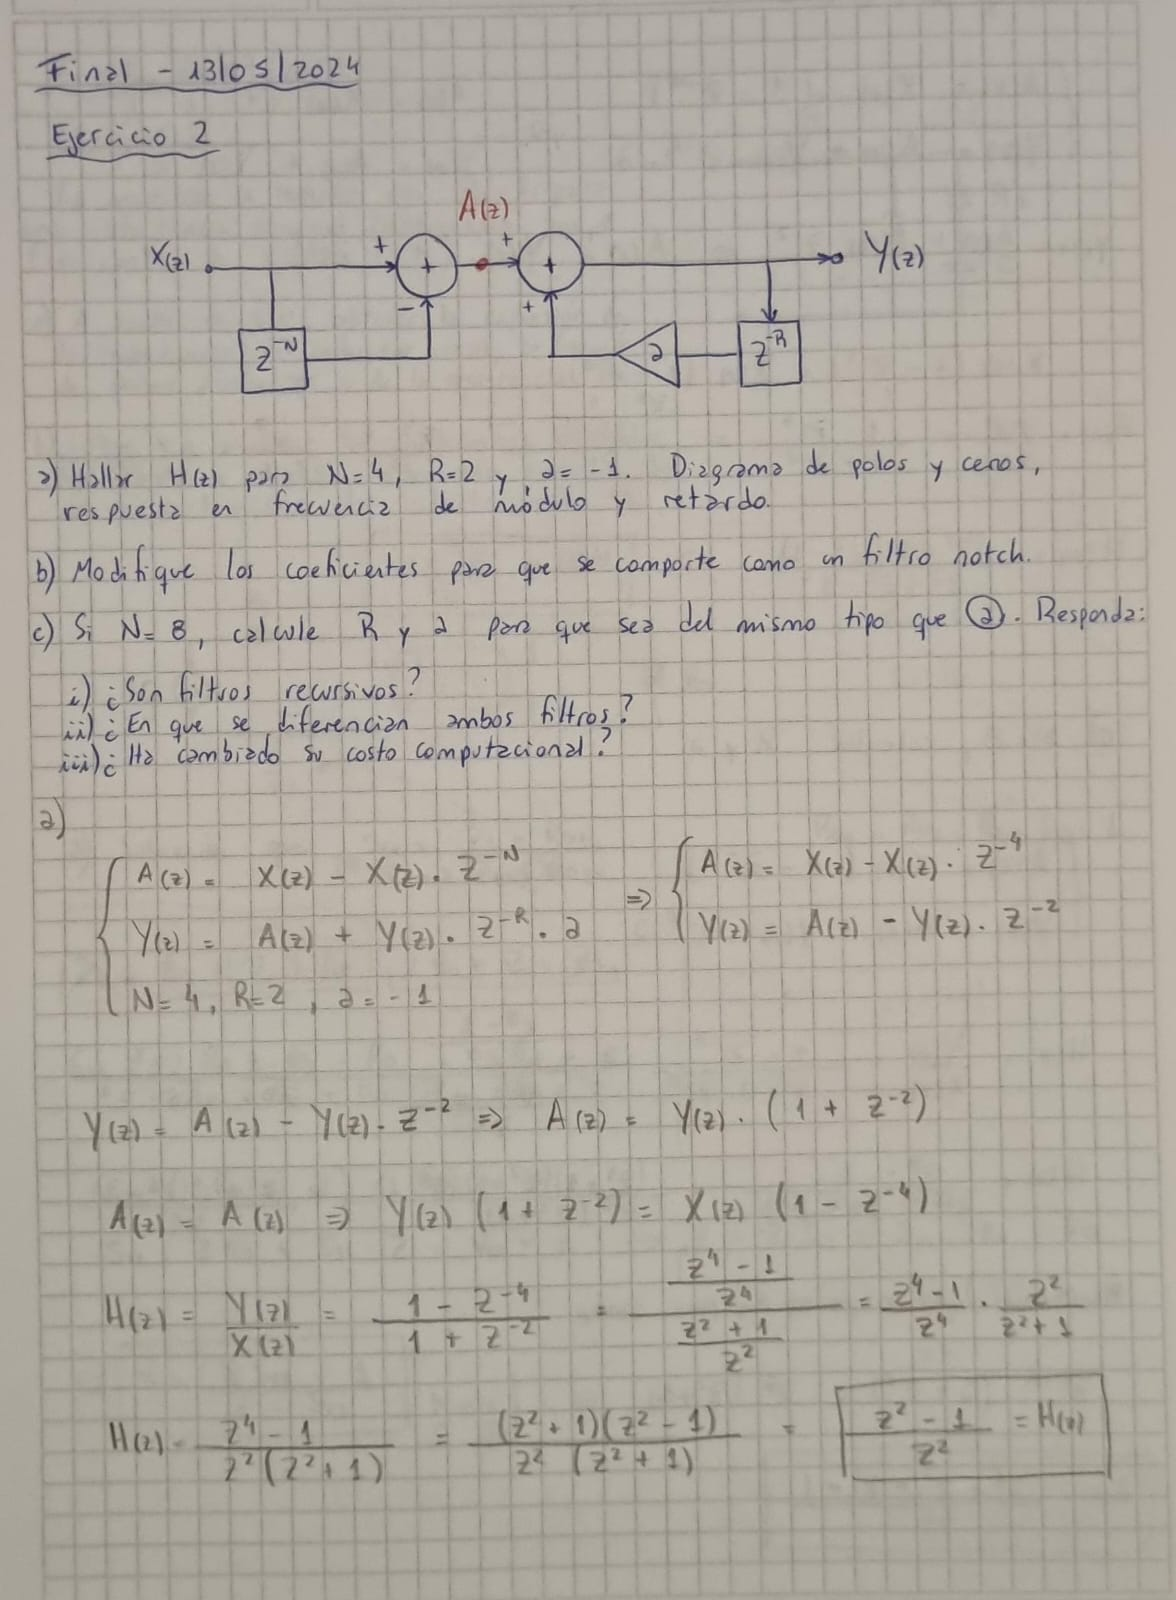

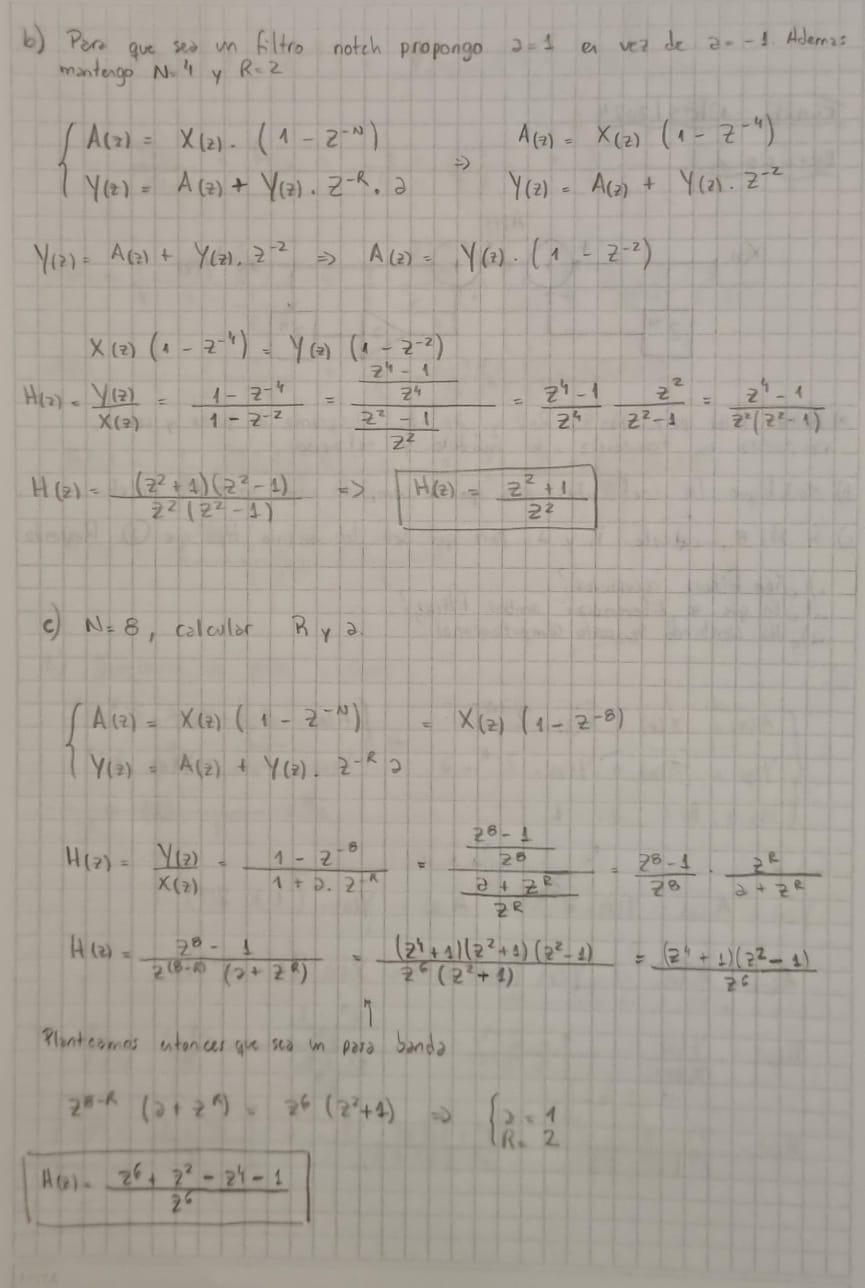

##### a) Halle la transferencia $H(z)$ para $N=4$; $R=2$ y $a=-1$. 

Calcule: 
1) el diagrama de polos y ceros y la respuesta en frecuencia de
2) módulo y
3) retardo.

Para la resolución de este ejercicio, se plantea un sistema de 5 ecuaciones:

(1) $ A(z) = X(z) - X(z) . z^{-N} $

(2) $ Y(z) = A(z) + a . Y(z) . z^{-R} $

(3) $ N = 4 $

(4) $ R = 2 $

(5) $ a = -1 $

Operando (5), (4) en (2)

(6) $$ Y(z) = A(z) - Y(z) . z^{-2} $$ 

Operando (3) en (1)

$ A(z) = X(z) - X(z) . z^{-4} $ 

(7) $$ A(z) = X(z) . ( 1 - z^{-4}) $$

Reexpresando (6):

$ Y(z) = A(z) - Y(z) . z^{-2} $

$ A(z) = Y(z) + Y(z) . z^{-2} $

(8) $$ A(z) = Y(z) . (1 + z^{-2}) $$ 

Igualando (8) a (7)

$ A(z) = A(z) $

$ Y(z) . (1 + z^{-2}) = X(z) . ( 1 - z^{-4}) $

$ H(z) = \frac{Y(z)}{X(z)} $ 

$ H(z) = \frac{ 1 - z^{-4}}{1 + z^{-2}} $

$ H(z) = \frac{\frac{ z^{4} - 1 }{z^{4}}}{\frac{z^{2} + 1}{z^{2}}} $

$ H(z) = \frac{z^{4} - 1}{z^{4}} \frac{z^{2}}{z^{2} + 1} $

$ H(z) = \frac{z^{4} - 1}{z^{2} . (z^{2} + 1)} $

$ H(z) = \frac{(z^{2} - 1)(z^{2} + 1)}{z^{2} . (z^{2} + 1)} = \frac{(z^{2} - 1)}{z^{2} } $

$$ H(z) = \frac{z^{2} - 1}{z^{2} } $$





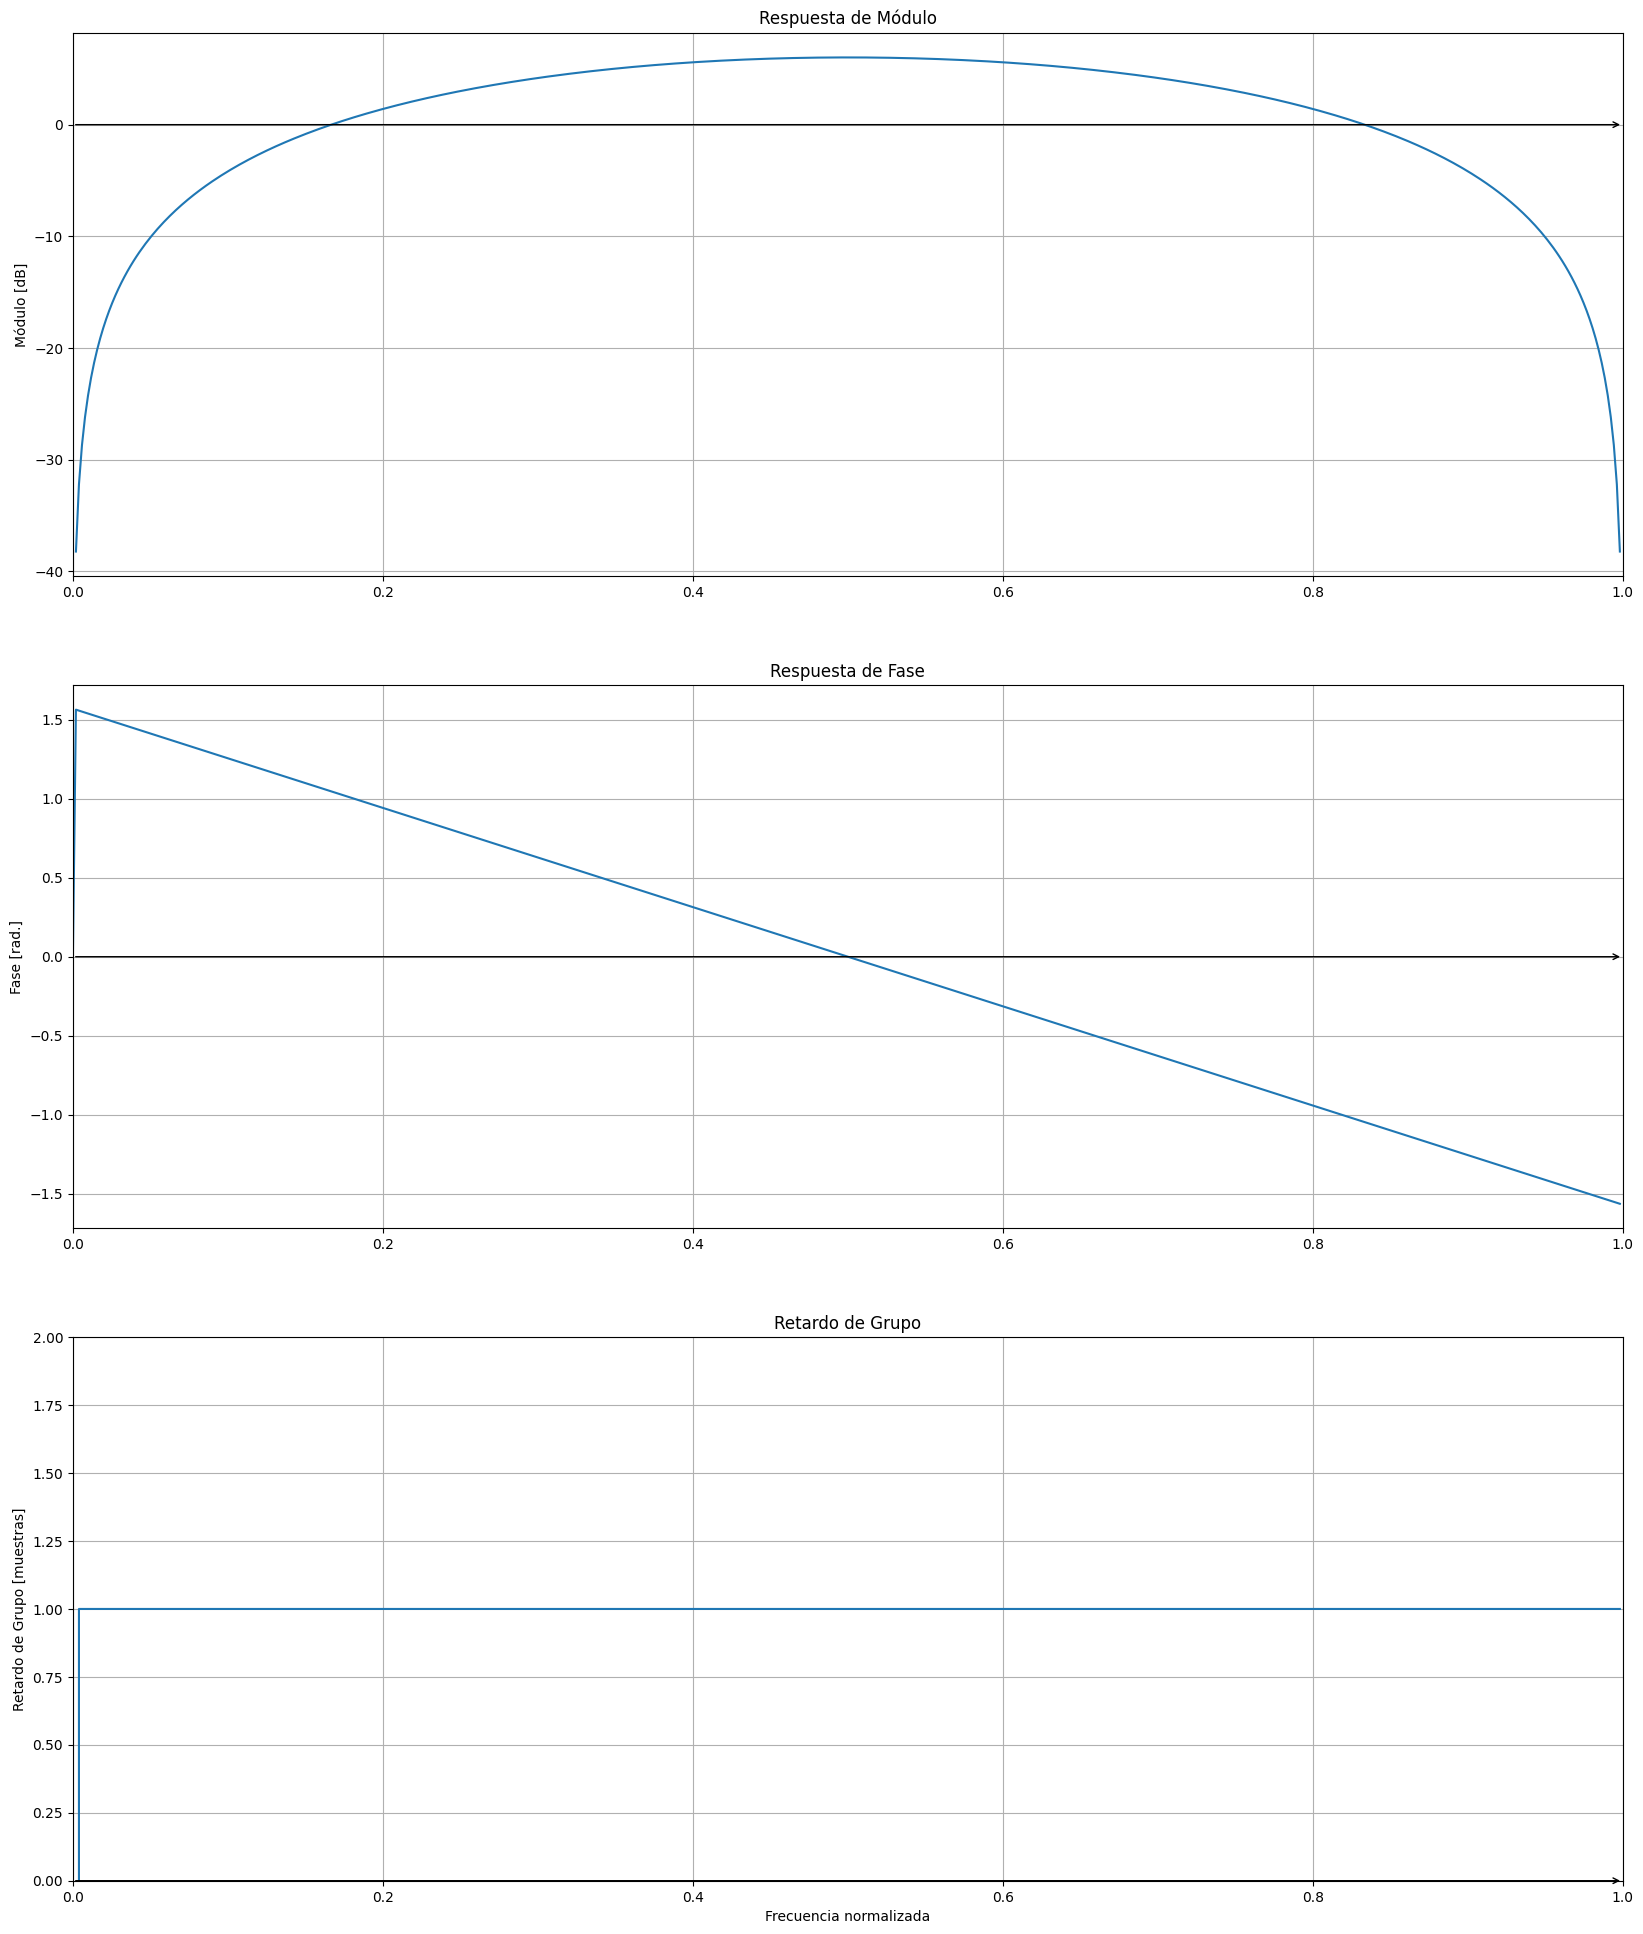

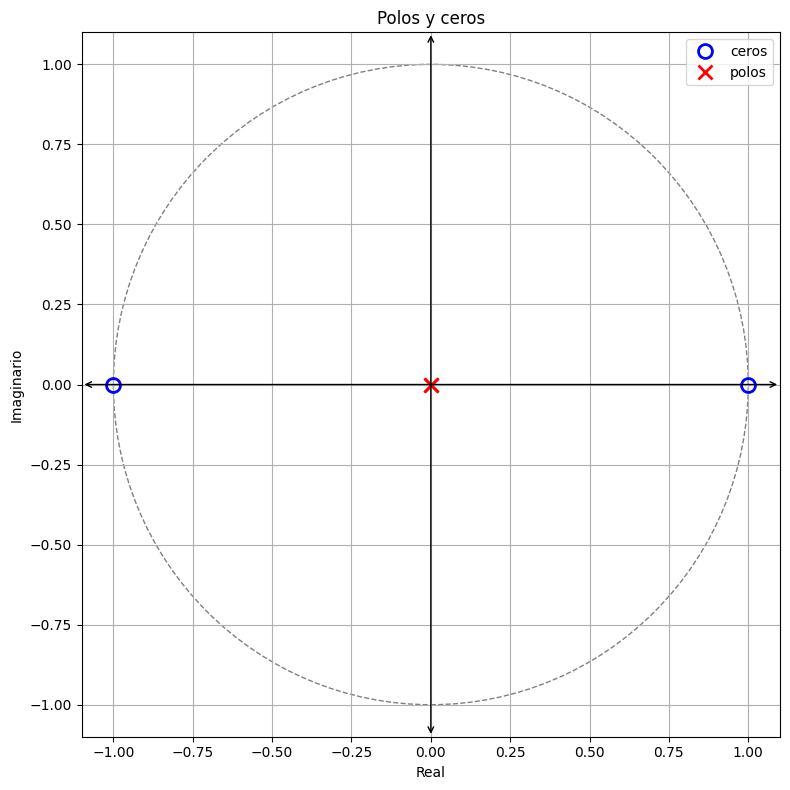

In [14]:
#Definimos bm1 y an1 para el filtro del ejercicio a)
bm1 =  np.array([1, 0, -1])
an1 =  np.array([1, 0, 0])

# planteamos una fs = 2 Hz, de modo tal que Nyqyuist = 1 Hz y tengamos el "ancho de banda" digital normalizado.
fs = 2
my_df1 = sig.TransferFunction(bm1, an1, dt=1/fs)
plot_frequency_response(my_df1)

Entonces se puede apreciar que este filtro resulta ser un filtro pasa banda digital.

##### b) Modifique los coeficientes para que se comporte como un filtro notch

Recordando el sistema de ecuaciones planteado al inicio:

(1) $ A(z) = X(z) - X(z) . z^{-N} $

(2) $ Y(z) = A(z) + a . Y(z) . z^{-R} $

Se propone plantear:

(5) $ a = 1 $

Y mantener los valores de:

(3) $ N = 4 $

(4) $ R = 2 $



Operando (5), (4) en (2)

(6) $$ Y(z) = A(z) + Y(z) . z^{-2} $$ 

Operando (3) en (1)

$ A(z) = X(z) - X(z) . z^{-4} $ 

(7) $$ A(z) = X(z) . ( 1 - z^{-4}) $$

Reexpresando (6):

$ Y(z) = A(z) + Y(z) . z^{-2} $

$ A(z) = Y(z) - Y(z) . z^{-2} $

(8) $$ A(z) = Y(z) . (1 - z^{-2}) $$ 




Igualando (8) a (7)

$ A(z) = A(z) $

$ Y(z) . (1 - z^{-2}) = X(z) . ( 1 - z^{-4}) $

$ H(z) = \frac{Y(z)}{X(z)} $ 

$ H(z) = \frac{ 1 - z^{-4}}{1 - z^{-2}} $

$ H(z) = \frac{\frac{ z^{4} - 1 }{z^{4}}}{\frac{z^{2} - 1}{z^{2}}} $

$ H(z) = \frac{z^{4} - 1}{z^{4}} \frac{z^{2}}{z^{2} - 1} $

$ H(z) = \frac{z^{4} - 1}{z^{2} . (z^{2} - 1)} $

$ H(z) = \frac{(z^{2} - 1)(z^{2} + 1)}{z^{2} . (z^{2} - 1)} = \frac{(z^{2} + 1)}{z^{2} } $

$$ H(z) = \frac{z^{2} + 1}{z^{2} } $$





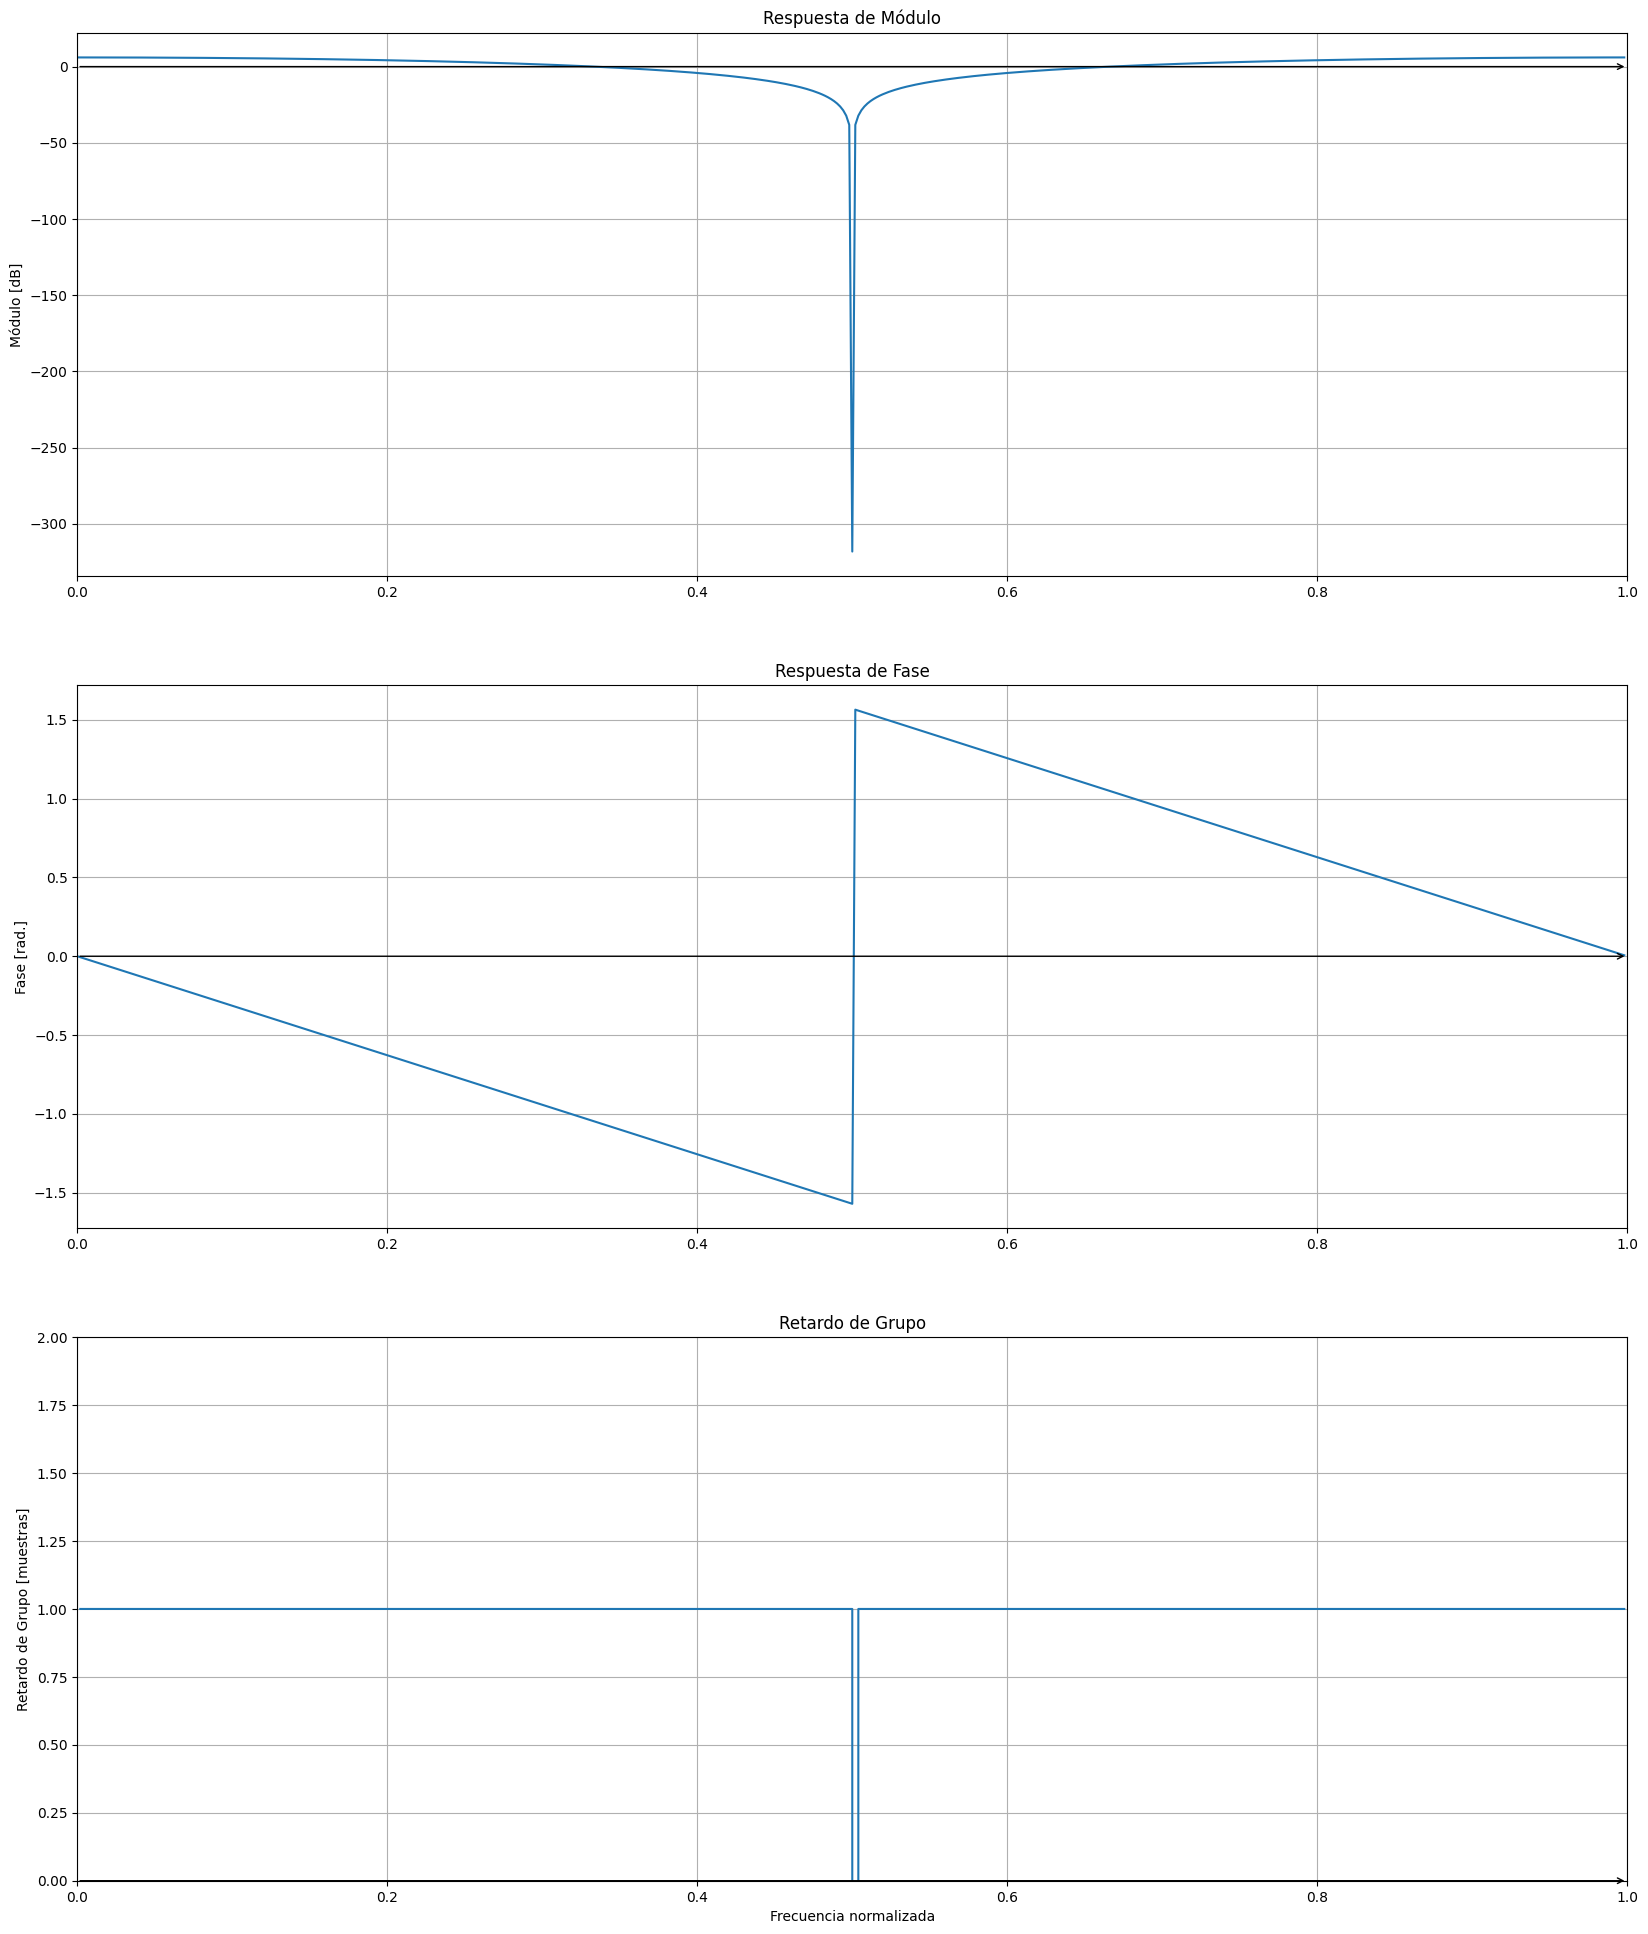

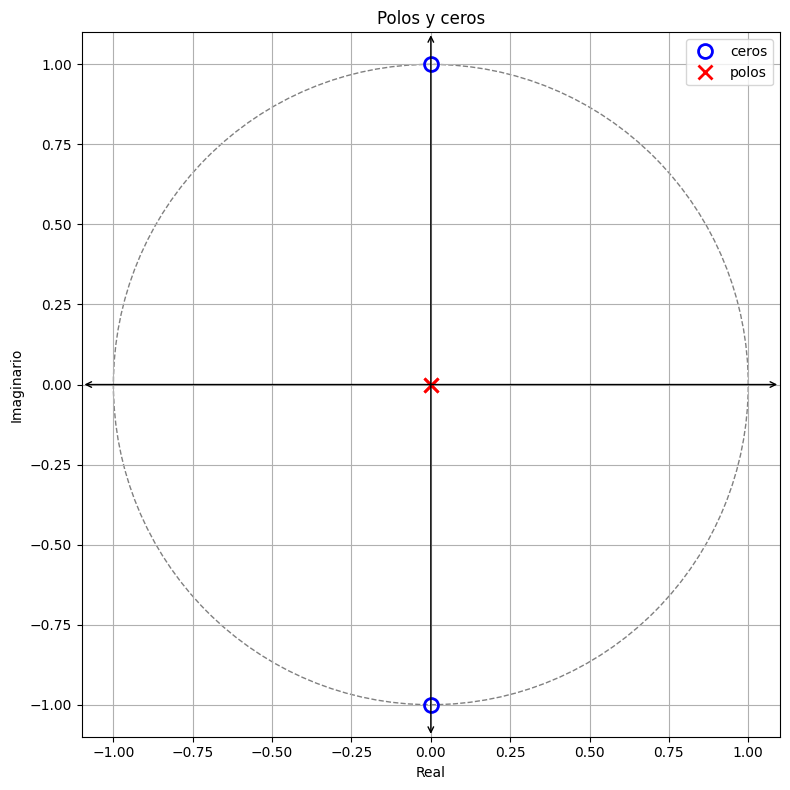

In [13]:
bm2 =  np.array([1, 0, 1])
an2 =  np.array([1, 0, 0])

# planteamos una fs = 2 Hz, de modo tal que Nyqyuist = 1 Hz y tengamos el "ancho de banda" digital normalizado.
fs = 2
my_df2 = sig.TransferFunction(bm2, an2, dt=1/fs)
plot_frequency_response(my_df2)

Entonces se puede apreciar que este filtro resulta ser un filtro notch digital.

##### c) Si $N=8$, calcule $R$ y $a$ para que tenga una transferencia del mismo tipo que el filtro a). 

Recordando el sistema de ecuaciones planteado al inicio:

(1) $ A(z) = X(z) - X(z) . z^{-N} $

(2) $ Y(z) = A(z) + a . Y(z) . z^{-R} $

Se propone plantear:

(3) $ N = 8 $

Operando (3) en (1)

$ A(z) = X(z) - X(z) . z^{-8} $ 

(4) $$ A(z) = X(z) . ( 1 - z^{-8}) $$


Reexpresando (2)

$ Y(z) = A(z) + a . Y(z) . z^{-R} $

(5) $$ A(z) = Y(z) . ( 1 + a . z^{-R}) $$


Buscamos la $H(z)$

$ H(z) = \frac{Y(z)}{X(z)} $

$ H(z) = \frac{1 - z^{-8}}{1 + a . z^{-R}} $

$ H(z) = \frac{\frac{z^{8} - 1}{z^{8}}}{\frac{a + z^{R}}{z^{R}}} $

$ H(z) = \frac{z^{8} - 1}{z^{8}} \frac{z^{R}}{a + z^{R}} $

$$ H(z) = \frac{z^{8} - 1}{z^{8 - R} (a + z^{R})} $$

Ahora, debemos plantear que esta transferencia se condiga con un pasa banda, por lo que se plantea que tome una forma como la siguiente:

$$ H(z) = \frac{(z^{4} + 1)(z^{2} - 1)(z^{2} + 1)}{(z^{2} + 1) . z^{6}} $$

Simplificando:
$$ H(z) = \frac{(z^{4} + 1)(z^{2} - 1)}{z^{6}} $$

Igualando los denominadores:

$ z^{8 - R} (a + z^{R}) = z^{6} (z^{2} + 1) $

$ z^{8-R} = z^{6} $

$ 8 - R = 6 $

$$ R = 2 $$

$ a + z^{R} = z^{2} + 1 $

y $ R = 2 $

$$ a = 1 $$

Finalmente, tendremos una transferencia como la buscada:

$ H(z) = \frac{(z^{4} + 1)(z^{2} + 1)}{z^{6}} $

Que, distribuyendo, nos quedará de la siguiente manera:

$$ H(z) = \frac{z^{6} - z^{4} + z^{2} - 1}{z^{6}} $$

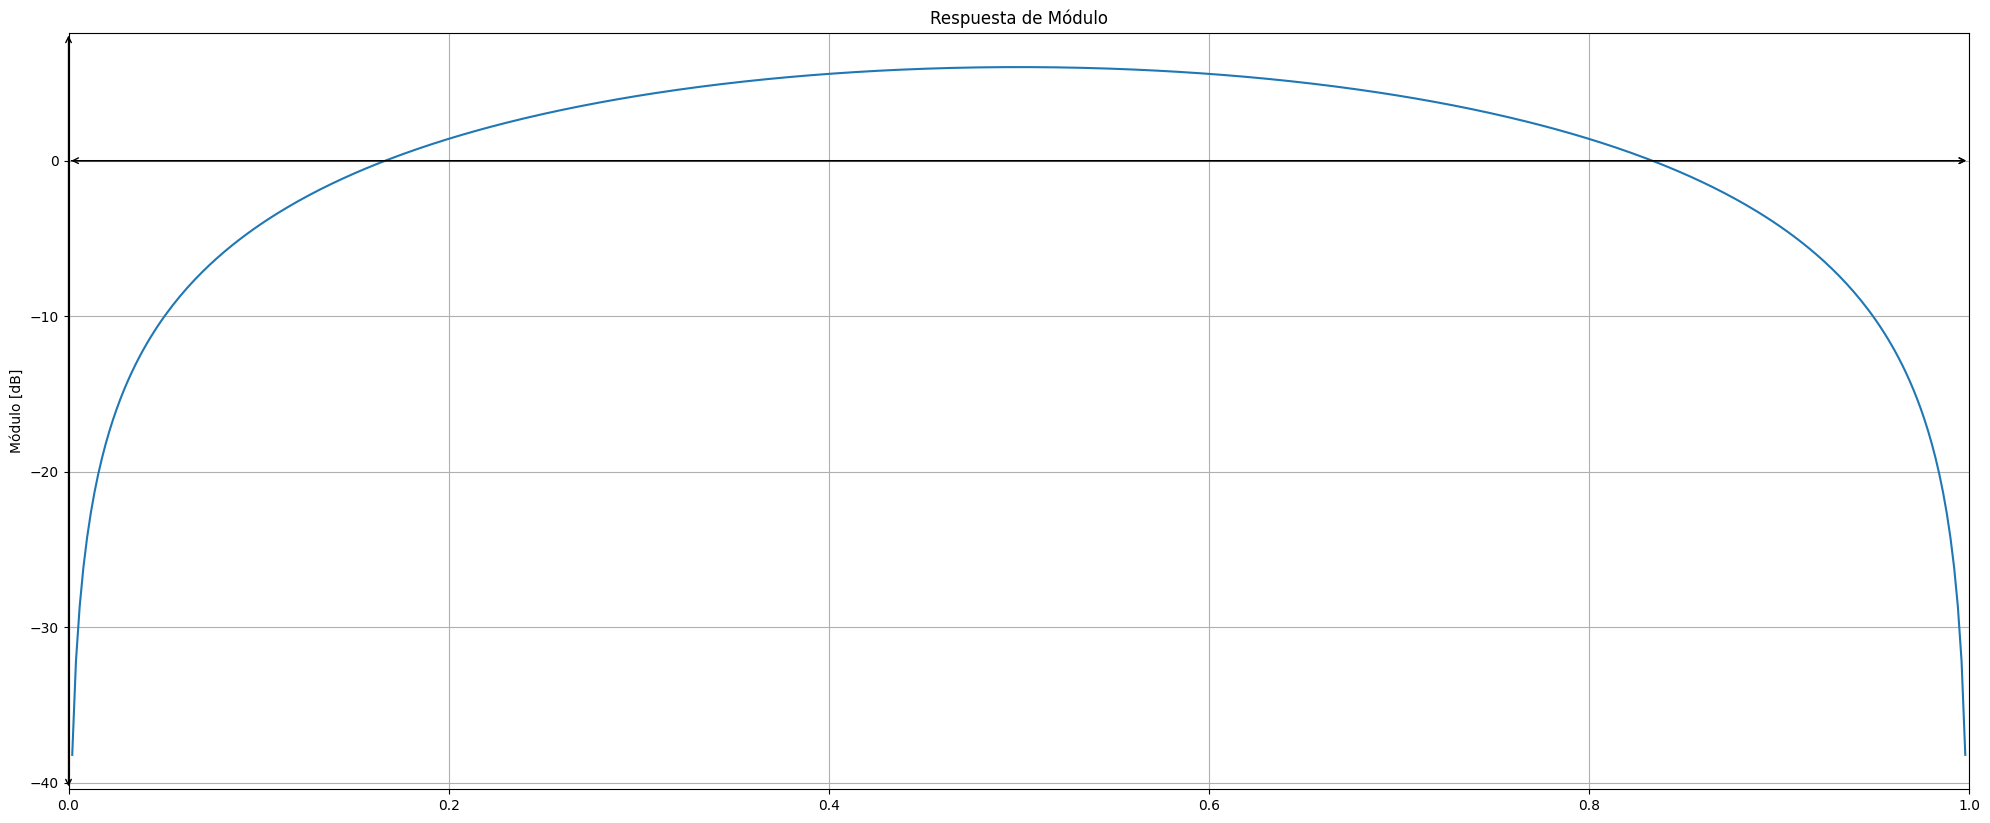

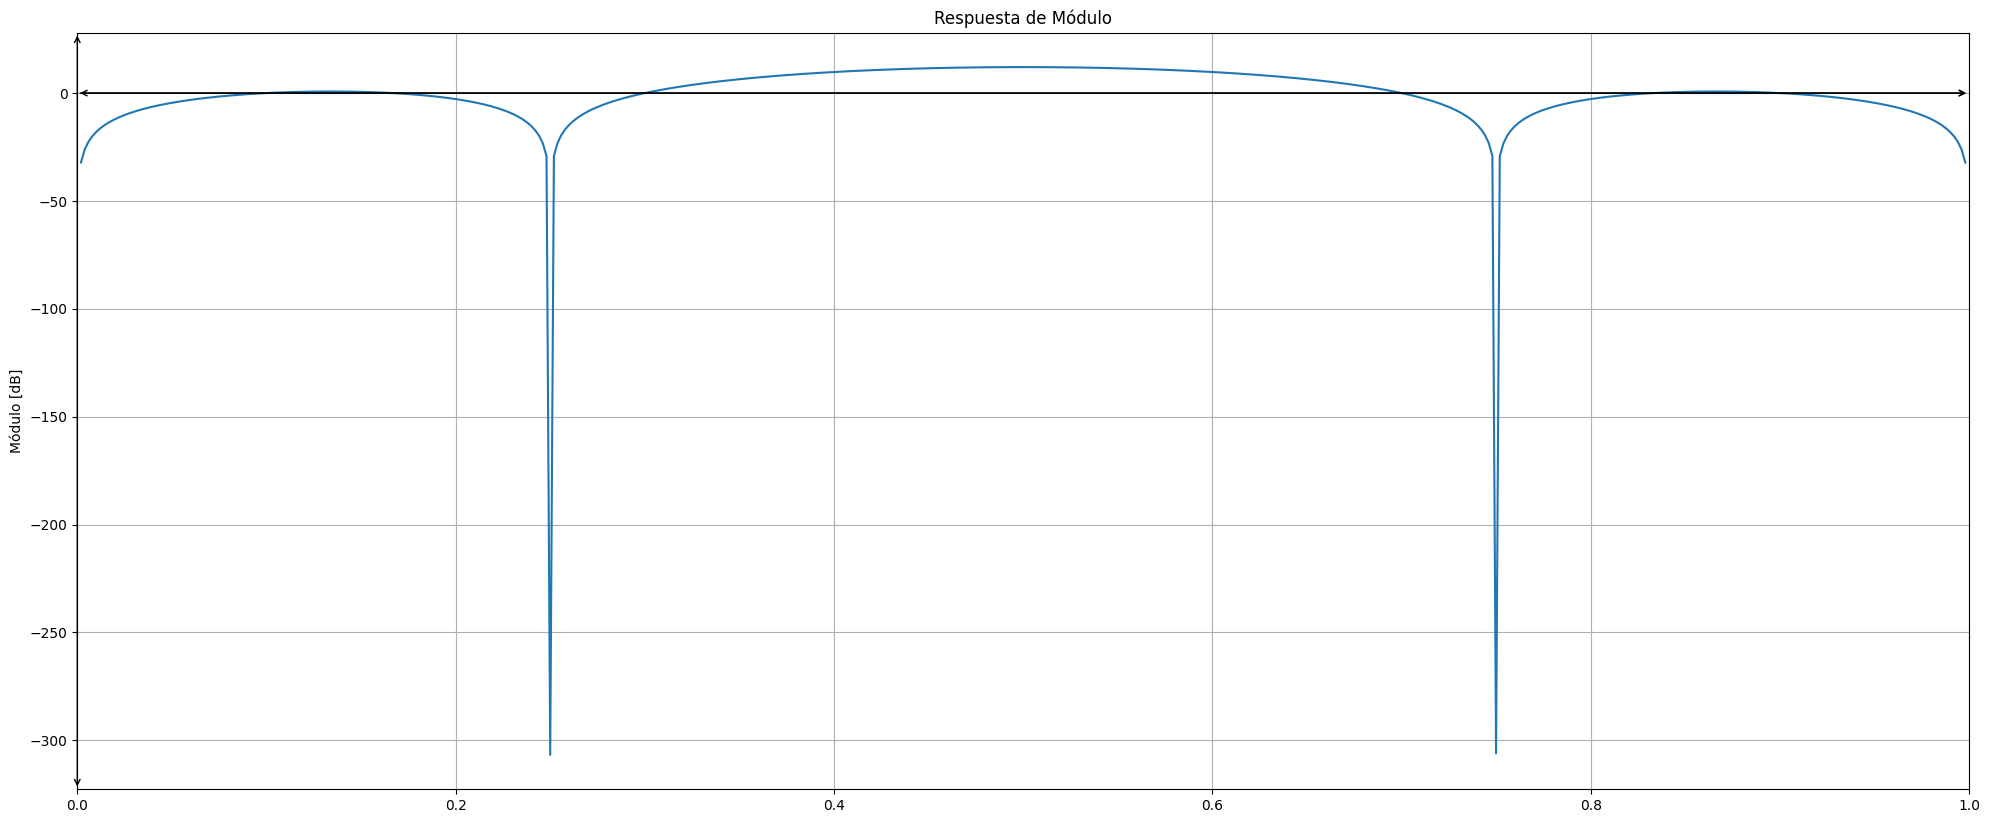

In [15]:
bm3 =  np.array([1, 0, -1, 0, 1, 0, -1])
an3 =  np.array([1, 0, 0, 0, 0, 0, 0])

# planteamos una fs = 2 Hz, de modo tal que Nyqyuist = 1 Hz y tengamos el "ancho de banda" digital normalizado.
fs = 2
my_df3 = sig.TransferFunction(bm3, an3, dt=1/fs)
#plot_frequency_response(my_df)

plot_module_response(my_df1)
plot_module_response(my_df3)

##### d) Responda:
i) ¿Son filtros recursivos?
Todos los filtros analizados son recursivos, ya que sus salidas dependen de la propia salida. Lo identificamos con la fórmula $(2)$ en cada uno de los desarrollos.


ii) ¿En qué se diferencian ambos filtros?
Ver gráficos.


iii) ¿Ha cambiado su costo computacional?
El costo computacional no debería cambiar ya que la cantidad de operaciones matemáticas que debe realizar el procesador son las mismas. 